In [58]:
import ipywidgets as widgets
w = widgets.Dropdown(
    options={'2016-06-28': 0, '2016-07-08': 1, '2016-07-18': 2},
    value=1,
    description='Select date for NetCDF file:',
)

files = ['1band.nc','1bandA.nc','1bandC.nc']
filename = files[0]
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        filename = files[change['new']]
        print "changed to %s" % files[change['new']]

w.observe(on_change)

display(w)

changed to 1band.nc


In [63]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np
filename = "/home/aguilarf/IFCA/Doctorado/Analisis/NetCDF/Satelite/ProcessSatalliteData/%s" % filename
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
#band1 = fh.variables['Band1'][:].data[:]
band1 = fh.variables['Band1'][:]
import matplotlib.pyplot as plt
lon_0 = lons.mean()
lat_0 = lats.mean()
m = Basemap(width=15000, height=9000,resolution='l',projection='stere',lat_ts=40,lat_0=lat_0,lon_0=lon_0)
lon, lat = np.meshgrid(lons,lats)
xi, yi = m(lon, lat)
cs = m.pcolor(xi,yi,np.squeeze(band1))
m.drawcoastlines()
m.drawstates()
m.drawcountries()
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('Concentration')
plt.title('Chl Concentration')
plt.show()

IOError: No such file or directory

In [35]:
print min(band1[14])

1.752


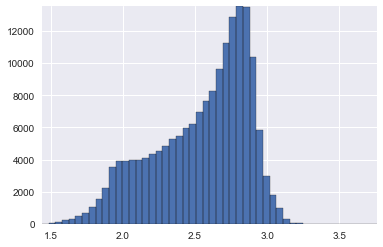

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

fig, ax = plt.subplots()

# Fixing random state for reproducibility
np.random.seed(19680801)


# histogram our data with numpy

n, bins = np.histogram(band1, 50)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n


# we need a (numrects x numsides x 2) numpy array for the path helper
# function to build a compound path
XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T

# get the Path object
barpath = path.Path.make_compound_path_from_polys(XY)

# make a patch out of it
patch = patches.PathPatch(barpath)
ax.add_patch(patch)

# update the view limits
ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

plt.show()